In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
cleaned_file_path = "../Dataset/Algerian_forest_fires_cleaned_dataset.csv"

In [25]:
df = pd.read_csv(cleaned_file_path)

In [26]:
df_raw = pd.read_csv(cleaned_file_path)

In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [29]:
df.shape

(243, 15)

In [30]:
# lets drop day,month,year as it is not a part in the classification
df = df.drop(['day','month','year'],axis=1)

In [31]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [32]:
# Encoding Classes category

df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [33]:
# Clean Different strings with or without spaces

df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [34]:
print(df.head())
print(df['Classes'].value_counts())

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0
Classes
1    137
0    106
Name: count, dtype: int64


In [35]:
## Saving csv for classes categorised data

df.to_csv("../Dataset/Algerian_forest_fires_category_cleaned_dataset.csv",index=False)

In [36]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

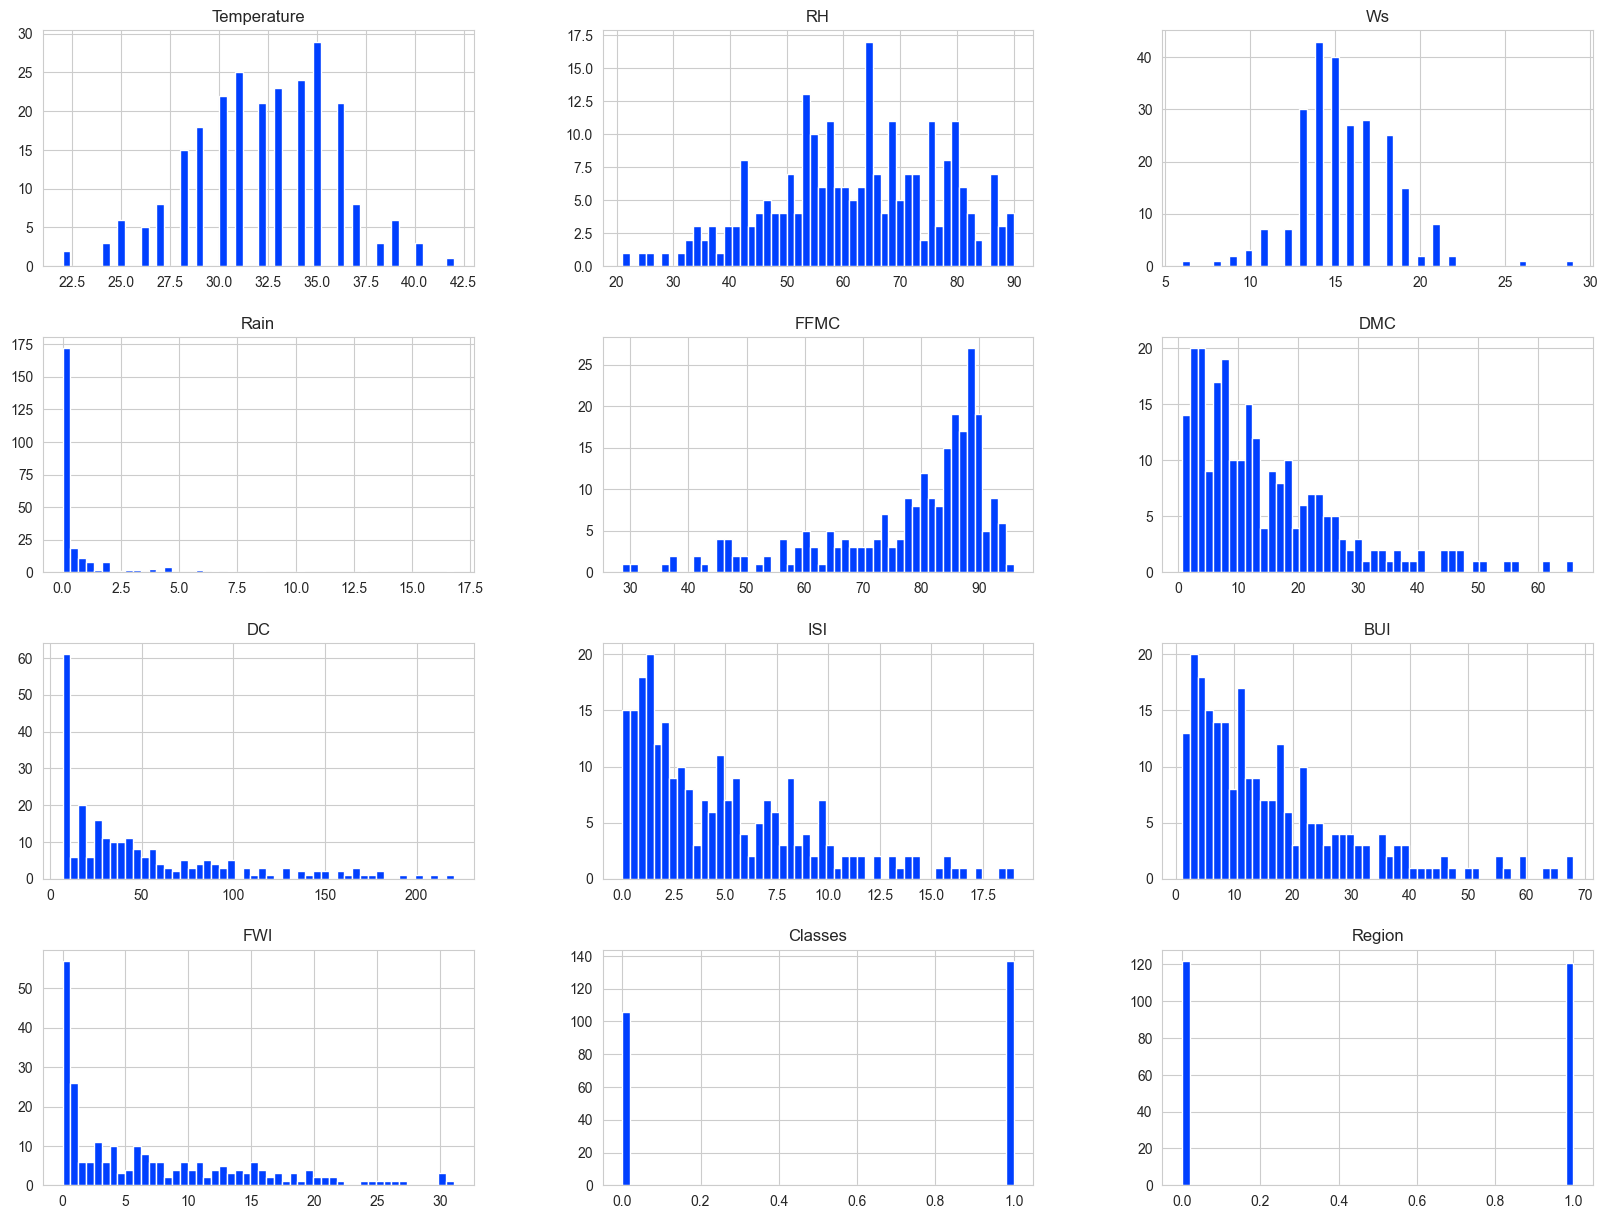

In [37]:
## Plot densit plot for all features
plt.style.use([i for i in plt.style.available if str(i).__contains__('seaborn')][1])
df.hist(bins=50,figsize=(20,15))
plt.show()

In [38]:
## Percentage of pie chart

classes_percentage = df['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Pie chart of Classes')

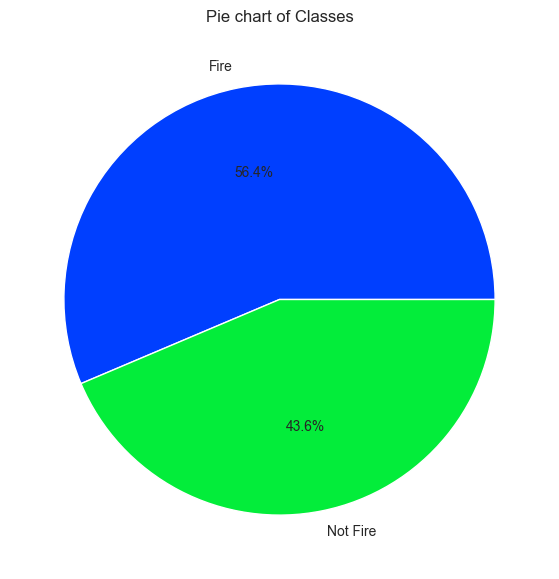

In [39]:
## ply chart
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(classes_percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie chart of Classes")

In [40]:
## Corerelation and multi colinearity
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

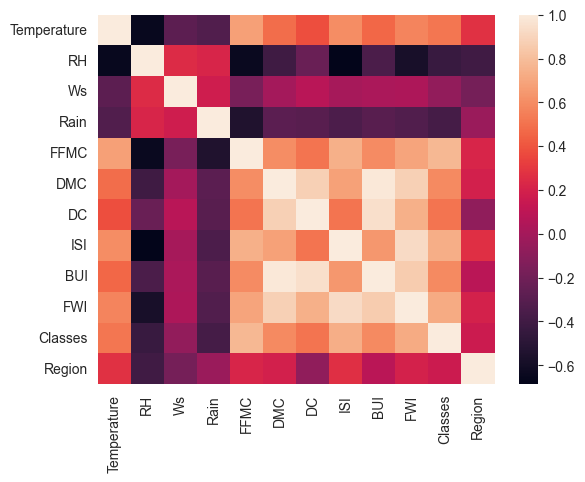

In [41]:
sns.heatmap(data=df.corr(),)

<Axes: ylabel='FWI'>

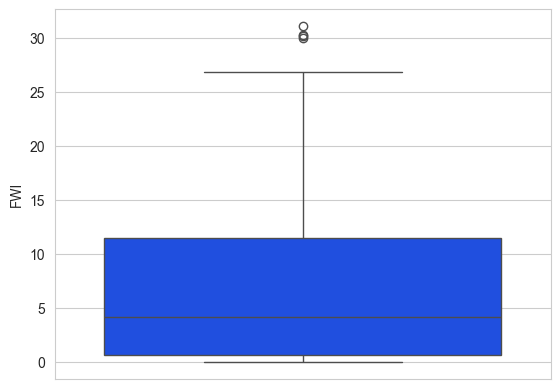

In [42]:
## box plots
sns.boxplot(df['FWI'])

In [43]:
## data including day month..
df_raw = pd.read_csv(cleaned_file_path)
df_raw['Classes'] = np.where(df_raw['Classes'].str.contains('not fire'),0,1)

Text(0.5, 1.0, 'Fire Analysis of Siddi Region')

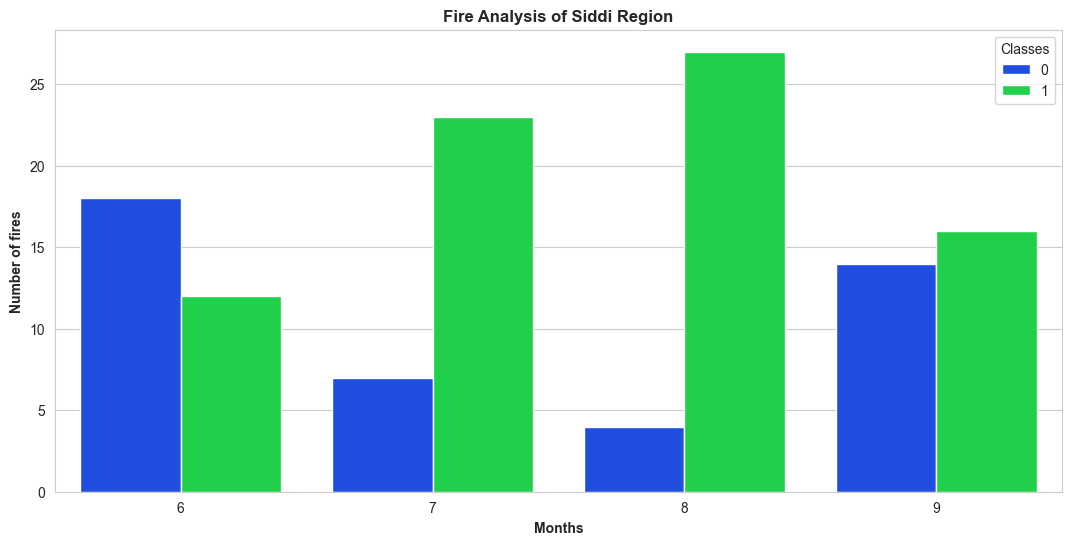

In [44]:
df_temp=df_raw.loc[df_raw['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data = df_temp)
plt.ylabel("Number of fires", weight='bold')
plt.xlabel("Months",weight="bold")
plt.title('Fire Analysis of Siddi Region',weight="bold")